In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datasist.structdata import detect_outliers

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import norm
import statsmodels.stats.api as sms

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

In [2]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris = iris[['petal_length', 'petal_width']]
iris

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


## preprocessing

In [4]:
iris.duplicated().sum()

48

In [5]:
iris.drop_duplicates(inplace=True)

C:\Users\shehab\AppData\Local\Temp\ipykernel_1564\2928604070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris.drop_duplicates(inplace=True)


In [6]:
iris.isna().sum()

petal_length    0
petal_width     0
dtype: int64

## split

In [7]:
x = iris['petal_length']
y = iris['petal_width']

<Axes: xlabel='petal_length', ylabel='petal_width'>

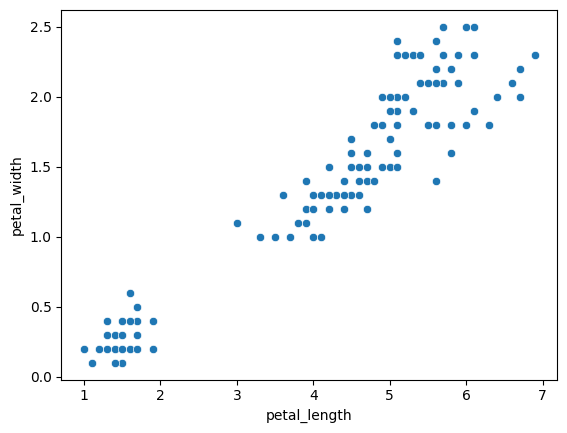

In [8]:
sns.scatterplot(x=x, y=y)

In [ ]:
sns.pairplot(df)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=23)

In [10]:
x_train = np.array(x_train).reshape(-1, 1)
x_train

array([[1.6],
       [1.5],
       [4.4],
       [1.7],
       [5.7],
       [6.7],
       [5. ],
       [4.2],
       [5.9],
       [4. ],
       [6.6],
       [5.4],
       [4.9],
       [1.4],
       [1.7],
       [4.6],
       [5.2],
       [3.9],
       [4.7],
       [5.9],
       [1.5],
       [4.2],
       [3.5],
       [3.6],
       [5.6],
       [6. ],
       [5.1],
       [5. ],
       [1.3],
       [6.3],
       [4.4],
       [1. ],
       [5.1],
       [5.1],
       [4.2],
       [1.3],
       [3. ],
       [5.8],
       [4.3],
       [4.5],
       [1.9],
       [5.6],
       [4.5],
       [5.3],
       [6.7],
       [5.8],
       [4.7],
       [1.7],
       [3.7],
       [1.6],
       [4.1],
       [4. ],
       [5.6],
       [4.8],
       [6.1],
       [6.9],
       [3.9],
       [4. ],
       [5.3],
       [4.7],
       [6. ]])

In [11]:
x_test = np.array(x_test).reshape(-1, 1)
x_test

array([[3.3],
       [5.7],
       [6.1],
       [4.5],
       [5.7],
       [3.9],
       [5. ],
       [4.6],
       [5.5],
       [6.4],
       [4.8],
       [4.9],
       [5.2],
       [4.4],
       [3.8],
       [5.6],
       [6.1],
       [1.7],
       [4.7],
       [1.9],
       [4.1],
       [4.9],
       [1.5],
       [1.6],
       [1.2],
       [5.6],
       [5.1],
       [5.8],
       [5. ],
       [5.1],
       [1.1],
       [1.3],
       [5.5],
       [1.4],
       [5.1],
       [5.4],
       [5.1],
       [1.4],
       [1.5],
       [4.5],
       [4.6]])

### scaling

In [12]:
scaler = StandardScaler()
scaler.fit(x_train)

scaled_x_train = scaler.transform(x_train)
scaled_x_test  = scaler.transform(x_test)

## Model

In [18]:
model = LinearRegression()
model.fit(scaled_x_train, y_train)

LinearRegression()

In [19]:
c = model.intercept_
c 

1.436065573770492

In [20]:
m = model.coef_
m 

array([0.65991398])

In [22]:
y_pred_train = model.predict(scaled_x_train)
y_pred_train

array([0.3293438 , 0.28845341, 1.47427462, 0.37023418, 2.00584965,
       2.41475352, 1.71961694, 1.39249385, 2.08763042, 1.31071308,
       2.37386313, 1.88317849, 1.67872656, 0.24756302, 0.37023418,
       1.5560554 , 1.80139772, 1.26982269, 1.59694578, 2.08763042,
       0.28845341, 1.39249385, 1.10626114, 1.14715153, 1.96495926,
       2.12852081, 1.76050733, 1.71961694, 0.20667264, 2.25119197,
       1.47427462, 0.08400148, 1.76050733, 1.76050733, 1.39249385,
       0.20667264, 0.90180921, 2.04674004, 1.43338424, 1.51516501,
       0.45201496, 1.96495926, 1.51516501, 1.8422881 , 2.41475352,
       2.04674004, 1.59694578, 0.37023418, 1.18804192, 0.3293438 ,
       1.35160346, 1.31071308, 1.96495926, 1.63783617, 2.1694112 ,
       2.49653429, 1.26982269, 1.31071308, 1.8422881 , 1.59694578,
       2.12852081])

Text(0, 0.5, 'petal width')

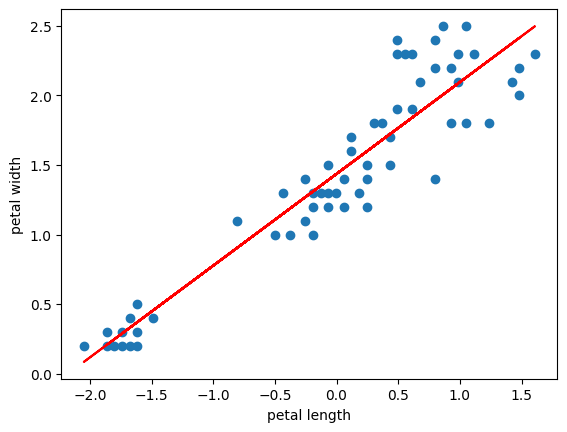

In [23]:
plt.scatter(scaled_x_train, y_train)
plt.plot(scaled_x_train, y_pred_train, color = 'red')
plt.xlabel("petal length")
plt.ylabel("petal width")

In [24]:
y_pred_test = model.predict(scaled_x_test)
y_pred_test

array([1.02448037, 2.00584965, 2.1694112 , 1.51516501, 2.00584965,
       1.26982269, 1.71961694, 1.5560554 , 1.92406888, 2.29208236,
       1.63783617, 1.67872656, 1.80139772, 1.47427462, 1.2289323 ,
       1.96495926, 2.1694112 , 0.37023418, 1.59694578, 0.45201496,
       1.35160346, 1.67872656, 0.28845341, 0.3293438 , 0.16578225,
       1.96495926, 1.76050733, 2.04674004, 1.71961694, 1.76050733,
       0.12489186, 0.20667264, 1.92406888, 0.24756302, 1.76050733,
       1.88317849, 1.76050733, 0.24756302, 0.28845341, 1.51516501,
       1.5560554 ])

Text(0, 0.5, 'petal width')

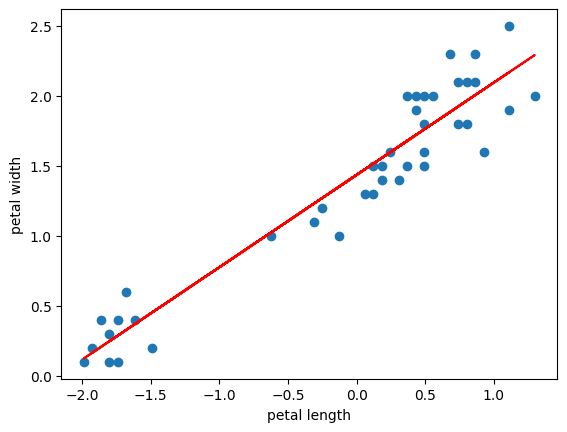

In [25]:
plt.scatter(scaled_x_test, y_test)
plt.plot(scaled_x_test, y_pred_test, color = 'red')
plt.xlabel("petal length")
plt.ylabel("petal width")

In [26]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_test)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred_test)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_test)
# Perform Residual Analysis (optional)
residuals = y_test - y_pred_test
# Calculate Durbin-Watson Statistic (optional)
durbin_watson = sms.durbin_watson(residuals)
# Step 8: Check Normality of Residuals (optional)
p_value = sms.jarque_bera(residuals)[1]
is_residuals_normal = p_value > 0.05  # If True, residuals are normally distributed
# Step 9: Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# Optional: Print Durbin-Watson Statistic and Normality of Residuals
print(f"Durbin-Watson Statistic: {durbin_watson:.2f}")
print(f"Residuals are normally distributed: {is_residuals_normal}")

Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.21
R-squared (R2): 0.91
Mean Absolute Error (MAE): 0.18
Durbin-Watson Statistic: 1.76
Residuals are normally distributed: True
